In [1]:
# Data Science Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import datetime

# Linear ALgorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Tree Based Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Machine Learning proccessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
# Display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [3]:
# Read in CSV
df_FDS = pd.read_csv("FinalDS.csv")

In [4]:
# Datetime conversion
df_FDS["Date"] = pd.to_datetime(df_FDS["Date"])

In [5]:
df_FDS["cott"] = (df_FDS['COT']*df_FDS['INV'])

In [6]:
df_FDS["icot"] = (df_FDS['COT']/df_FDS['INV'])

In [7]:
df_FDS["idng"] = (df_FDS['DNG']/df_FDS['INV'])

In [8]:
df_FDS["dngt"] = (df_FDS['DNG']*df_FDS['INV'])

In [9]:
df_FDS.head()

,Returns,Volatility,Node,Date,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,cott,icot,idng,dngt
0,NaN,NaN,East,2010-01-01,7.66,769,174475.2,13475.0,-1.78,5.770,724087,5.88,556822903,941.595579,226.885826,134171428.8
1,-0.481303,0.484173,East,2010-01-08,7.66,703,174475.2,13475.0,-1.10,5.818,760159,6.56,534391777,1081.307255,248.186629,122656065.6
2,0.587787,0.595347,East,2010-01-15,7.66,642,174475.2,13475.0,-1.98,5.610,782549,5.68,502396458,1218.923676,271.768224,112013078.4
3,0.058840,0.061240,East,2010-01-22,7.66,616,174475.2,13475.0,-2.10,5.625,769887,5.56,474250392,1249.816558,283.238961,107476723.2
4,0.041964,0.044199,East,2010-01-29,7.66,582,174475.2,13475.0,-2.19,5.350,782673,5.47,455515686,1344.798969,299.785567,101544566.4


In [10]:
# Null analysis
df_FDS = df_FDS.fillna(value=0)
df_FDS.head()

,Returns,Volatility,Node,Date,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,cott,icot,idng,dngt
0,0.000000,0.000000,East,2010-01-01,7.66,769,174475.2,13475.0,-1.78,5.770,724087,5.88,556822903,941.595579,226.885826,134171428.8
1,-0.481303,0.484173,East,2010-01-08,7.66,703,174475.2,13475.0,-1.10,5.818,760159,6.56,534391777,1081.307255,248.186629,122656065.6
2,0.587787,0.595347,East,2010-01-15,7.66,642,174475.2,13475.0,-1.98,5.610,782549,5.68,502396458,1218.923676,271.768224,112013078.4
3,0.058840,0.061240,East,2010-01-22,7.66,616,174475.2,13475.0,-2.10,5.625,769887,5.56,474250392,1249.816558,283.238961,107476723.2
4,0.041964,0.044199,East,2010-01-29,7.66,582,174475.2,13475.0,-2.19,5.350,782673,5.47,455515686,1344.798969,299.785567,101544566.4


In [11]:
df_FDS_date = df_FDS.set_index('Date')

In [13]:
df_FDS_date.head()

,Returns,Volatility,Node,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,cott,icot,idng,dngt
Date,,,,,,,,,,,,,,,
2010-01-01,0.000000,0.000000,East,7.66,769,174475.2,13475.0,-1.78,5.770,724087,5.88,556822903,941.595579,226.885826,134171428.8
2010-01-08,-0.481303,0.484173,East,7.66,703,174475.2,13475.0,-1.10,5.818,760159,6.56,534391777,1081.307255,248.186629,122656065.6
2010-01-15,0.587787,0.595347,East,7.66,642,174475.2,13475.0,-1.98,5.610,782549,5.68,502396458,1218.923676,271.768224,112013078.4
2010-01-22,0.058840,0.061240,East,7.66,616,174475.2,13475.0,-2.10,5.625,769887,5.56,474250392,1249.816558,283.238961,107476723.2
2010-01-29,0.041964,0.044199,East,7.66,582,174475.2,13475.0,-2.19,5.350,782673,5.47,455515686,1344.798969,299.785567,101544566.4


In [12]:
df_FDS.head()

,Returns,Volatility,Node,Date,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,cott,icot,idng,dngt
0,0.000000,0.000000,East,2010-01-01,7.66,769,174475.2,13475.0,-1.78,5.770,724087,5.88,556822903,941.595579,226.885826,134171428.8
1,-0.481303,0.484173,East,2010-01-08,7.66,703,174475.2,13475.0,-1.10,5.818,760159,6.56,534391777,1081.307255,248.186629,122656065.6
2,0.587787,0.595347,East,2010-01-15,7.66,642,174475.2,13475.0,-1.98,5.610,782549,5.68,502396458,1218.923676,271.768224,112013078.4
3,0.058840,0.061240,East,2010-01-22,7.66,616,174475.2,13475.0,-2.10,5.625,769887,5.56,474250392,1249.816558,283.238961,107476723.2
4,0.041964,0.044199,East,2010-01-29,7.66,582,174475.2,13475.0,-2.19,5.350,782673,5.47,455515686,1344.798969,299.785567,101544566.4


In [14]:
# df_FDS = df_FDS.reset_index(drop = True)

In [15]:
df_FDS.head()

,Returns,Volatility,Node,Date,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,cott,icot,idng,dngt
0,0.000000,0.000000,East,2010-01-01,7.66,769,174475.2,13475.0,-1.78,5.770,724087,5.88,556822903,941.595579,226.885826,134171428.8
1,-0.481303,0.484173,East,2010-01-08,7.66,703,174475.2,13475.0,-1.10,5.818,760159,6.56,534391777,1081.307255,248.186629,122656065.6
2,0.587787,0.595347,East,2010-01-15,7.66,642,174475.2,13475.0,-1.98,5.610,782549,5.68,502396458,1218.923676,271.768224,112013078.4
3,0.058840,0.061240,East,2010-01-22,7.66,616,174475.2,13475.0,-2.10,5.625,769887,5.56,474250392,1249.816558,283.238961,107476723.2
4,0.041964,0.044199,East,2010-01-29,7.66,582,174475.2,13475.0,-2.19,5.350,782673,5.47,455515686,1344.798969,299.785567,101544566.4


In [16]:
df_FDS.shape

(1830, 16)

In [17]:
df_FDS.describe()

,Returns,Volatility,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,cott,icot,idng,dngt
count,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000,1830.000000,1.830000e+03,1830.000000,1.830000e+03,1830.000000,1830.000000,1.830000e+03
mean,-0.006594,0.229796,5.007738,559.764481,89909.475410,91564.290164,-1.519760,3.493694,1.055391e+06,3.487978,5.894734e+08,3107.384245,195.217940,6.030667e+07
std,0.419054,0.355213,1.566180,348.303130,51761.103874,95923.960180,1.356882,0.872201,1.749606e+05,0.936041,3.812403e+08,2466.846332,121.000931,5.337954e+07
min,-4.025352,0.000000,2.250000,80.000000,20309.200000,0.000000,-7.230000,1.687000,7.240870e+05,1.570000,8.733552e+07,619.098347,39.445253,1.971316e+06
25%,-0.111810,0.036242,3.980000,249.250000,46073.000000,4879.750000,-2.070000,2.772000,9.489800e+05,2.790000,2.560400e+08,1211.284622,126.532770,1.207576e+07
50%,0.000000,0.103261,4.720000,482.500000,71874.750000,81122.500000,-1.120000,3.611500,1.019501e+06,3.540000,5.013384e+08,2242.535762,166.015038,4.272332e+07
75%,0.093090,0.264161,5.720000,874.000000,131413.000000,132187.387500,-0.600000,4.172000,1.174981e+06,4.150000,8.736800e+08,4304.546551,230.119172,1.038540e+08
max,3.465736,4.058148,11.350000,1370.000000,259140.250000,302955.500000,1.660000,5.975000,1.573733e+06,6.560000,1.636590e+09,13723.555556,1310.914671,2.112762e+08


In [18]:
df_FDS.corr()

,Returns,Volatility,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,cott,icot,idng,dngt
Returns,1.000000,0.002274,0.076218,-0.016444,-0.004983,-0.020101,-0.094775,-0.019239,-0.000536,-0.009858,-0.016088,0.004546,0.003551,-0.015849
Volatility,0.002274,1.000000,-0.141232,-0.018485,-0.005424,0.048650,0.281353,0.168538,0.066878,0.171541,0.007226,0.035524,0.044279,-0.001220
Sit,0.076218,-0.141232,1.000000,-0.049910,0.247112,-0.061842,-0.804160,0.503202,-0.147051,0.507488,-0.097432,-0.023005,0.249979,0.058992
INV,-0.016444,-0.018485,-0.049910,1.000000,0.553788,0.420146,-0.058615,-0.148005,-0.021293,-0.168477,0.958365,-0.796530,-0.459774,0.875962
DNG,-0.004983,-0.005424,0.247112,0.553788,1.000000,0.391351,-0.283760,-0.010827,0.021907,0.002130,0.540851,-0.566849,0.328269,0.831530
QNG,-0.020101,0.048650,-0.061842,0.420146,0.391351,1.000000,0.034444,-0.056424,0.034047,-0.053544,0.420677,-0.172881,-0.039306,0.543801
HHDiffit,-0.094775,0.281353,-0.804160,-0.058615,-0.283760,0.034444,1.000000,0.096669,0.042539,0.104079,-0.034233,0.115770,-0.122943,-0.154035
Ft,-0.019239,0.168538,0.503202,-0.148005,-0.010827,-0.056424,0.096669,1.000000,-0.207299,0.982086,-0.197472,0.107354,0.199114,-0.114116
COT,-0.000536,0.066878,-0.147051,-0.021293,0.021907,0.034047,0.042539,-0.207299,1.000000,-0.184381,0.223646,0.230522,0.047855,0.002051
HHst,-0.009858,0.171541,0.507488,-0.168477,0.002130,-0.053544,0.104079,0.982086,-0.184381,1.000000,-0.212648,0.129328,0.240047,-0.124584


In [19]:
corrs_FDS = df_FDS.corr()

In [20]:
corrs_FDS

,Returns,Volatility,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,cott,icot,idng,dngt
Returns,1.000000,0.002274,0.076218,-0.016444,-0.004983,-0.020101,-0.094775,-0.019239,-0.000536,-0.009858,-0.016088,0.004546,0.003551,-0.015849
Volatility,0.002274,1.000000,-0.141232,-0.018485,-0.005424,0.048650,0.281353,0.168538,0.066878,0.171541,0.007226,0.035524,0.044279,-0.001220
Sit,0.076218,-0.141232,1.000000,-0.049910,0.247112,-0.061842,-0.804160,0.503202,-0.147051,0.507488,-0.097432,-0.023005,0.249979,0.058992
INV,-0.016444,-0.018485,-0.049910,1.000000,0.553788,0.420146,-0.058615,-0.148005,-0.021293,-0.168477,0.958365,-0.796530,-0.459774,0.875962
DNG,-0.004983,-0.005424,0.247112,0.553788,1.000000,0.391351,-0.283760,-0.010827,0.021907,0.002130,0.540851,-0.566849,0.328269,0.831530
QNG,-0.020101,0.048650,-0.061842,0.420146,0.391351,1.000000,0.034444,-0.056424,0.034047,-0.053544,0.420677,-0.172881,-0.039306,0.543801
HHDiffit,-0.094775,0.281353,-0.804160,-0.058615,-0.283760,0.034444,1.000000,0.096669,0.042539,0.104079,-0.034233,0.115770,-0.122943,-0.154035
Ft,-0.019239,0.168538,0.503202,-0.148005,-0.010827,-0.056424,0.096669,1.000000,-0.207299,0.982086,-0.197472,0.107354,0.199114,-0.114116
COT,-0.000536,0.066878,-0.147051,-0.021293,0.021907,0.034047,0.042539,-0.207299,1.000000,-0.184381,0.223646,0.230522,0.047855,0.002051
HHst,-0.009858,0.171541,0.507488,-0.168477,0.002130,-0.053544,0.104079,0.982086,-0.184381,1.000000,-0.212648,0.129328,0.240047,-0.124584


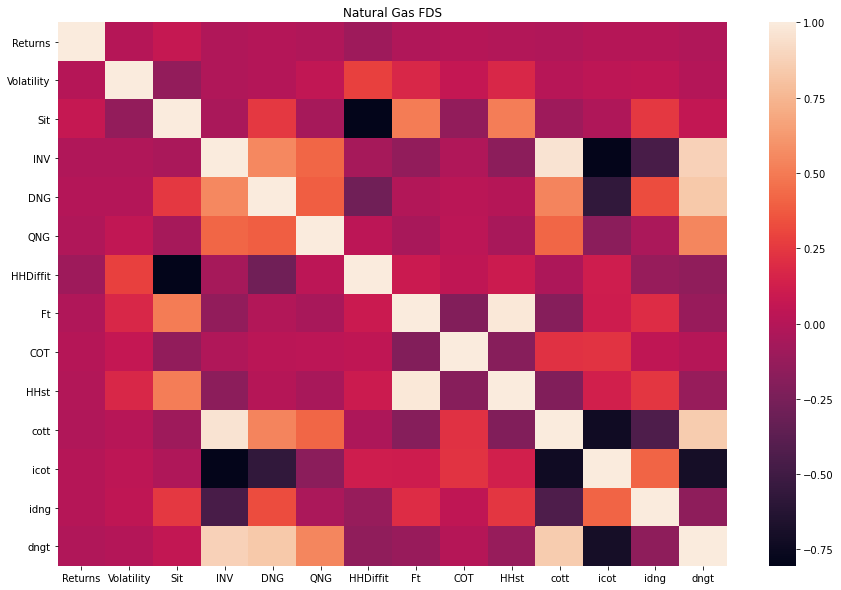

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(corrs_FDS)

plt.title('Natural Gas FDS')

# Save an image of the chart and print it to the screen
plt.savefig("Natural Gas FDS.png")

plt.show()

In [22]:
# Feature engineering, column selection.
# One must use ALL ONE-HOT ENCODED COLUMNS, one cannot simply use one column and leave the rest.
abs(df_FDS.corr()["HHst"]).sort_values(ascending=False)

HHst          1.000000
Ft            0.982086
Sit           0.507488
idng          0.240047
cott          0.212648
COT           0.184381
Volatility    0.171541
INV           0.168477
icot          0.129328
dngt          0.124584
HHDiffit      0.104079
QNG           0.053544
Returns       0.009858
DNG           0.002130
Name: HHst, dtype: float64

In [23]:
node

NameError: name 'node' is not defined

In [ ]:
# Comparison by Nodes
fds_comparison = df_FDS.groupby(['Node']).describe()
fds_comparison

# Begin Cumulative Plots

#  Histograms

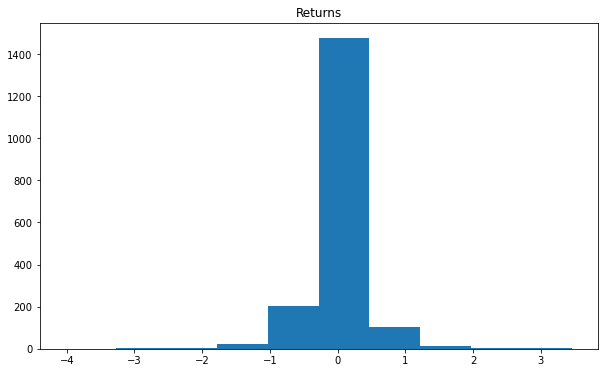

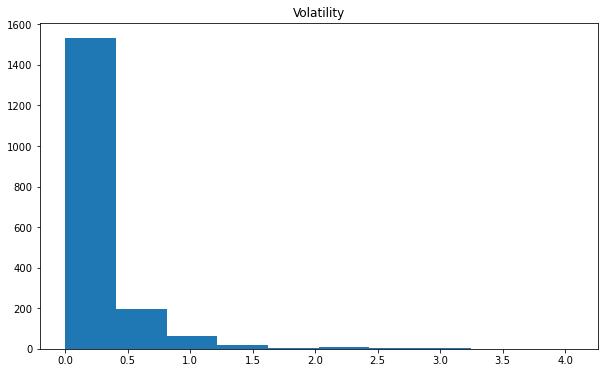

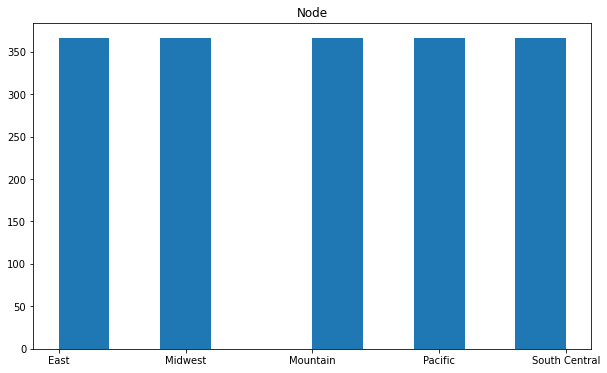

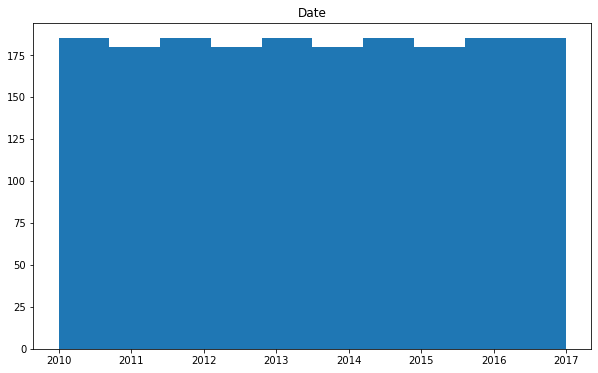

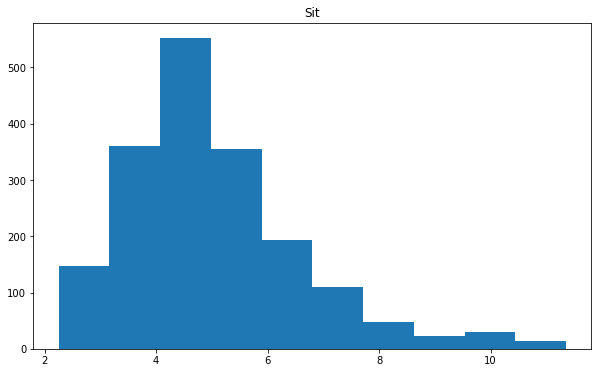

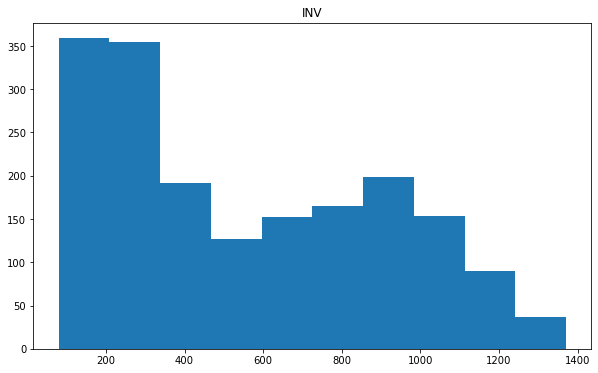

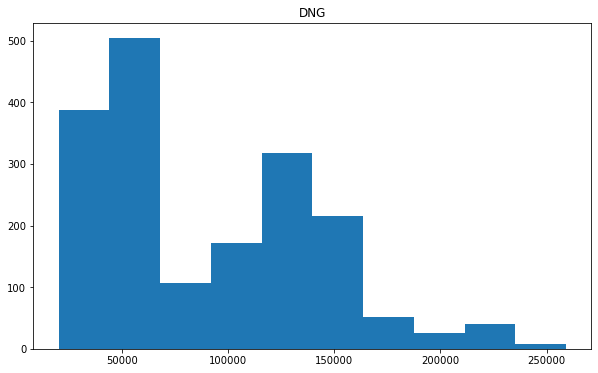

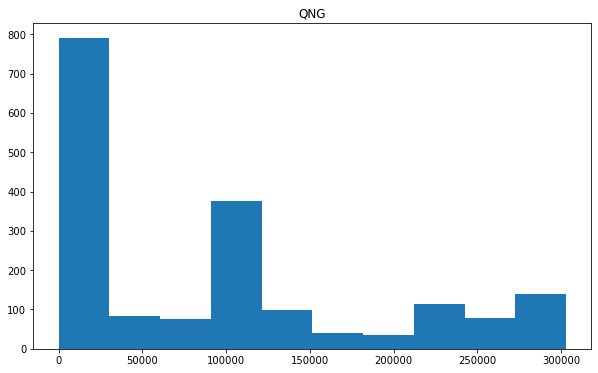

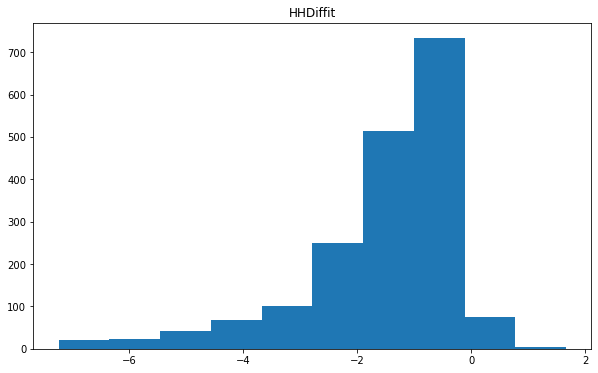

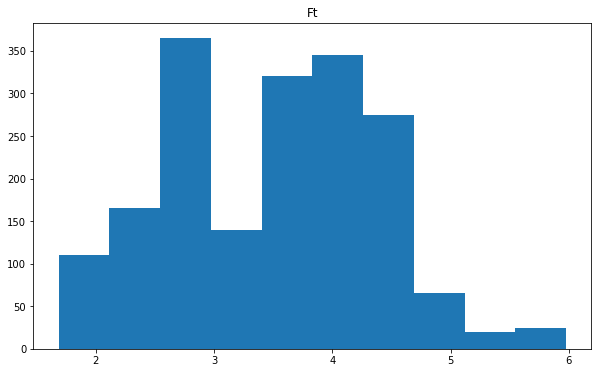

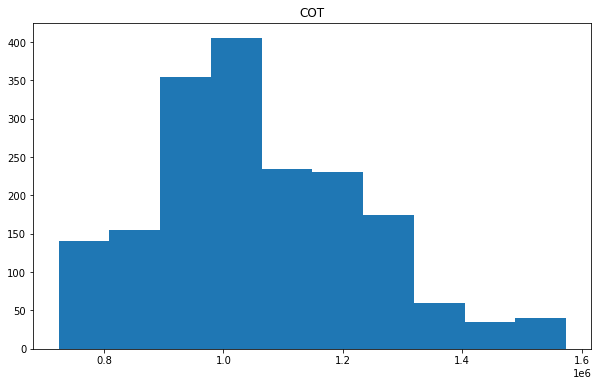

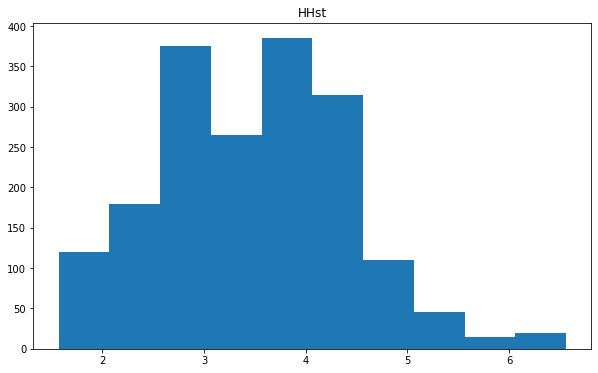

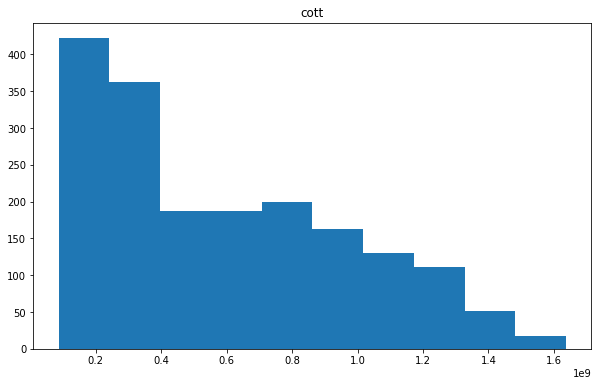

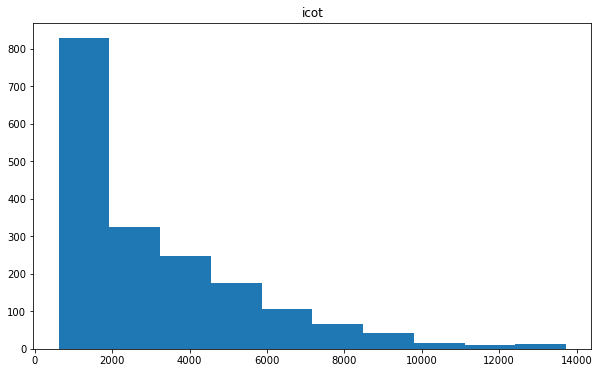

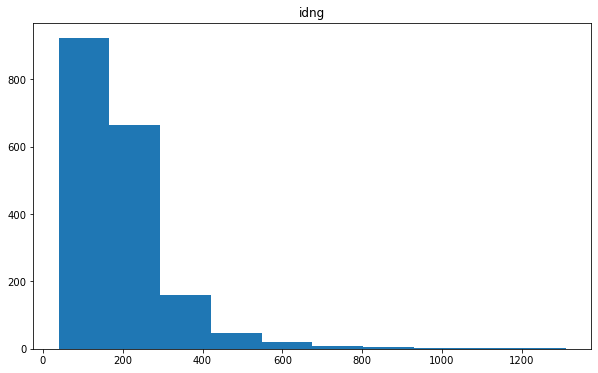

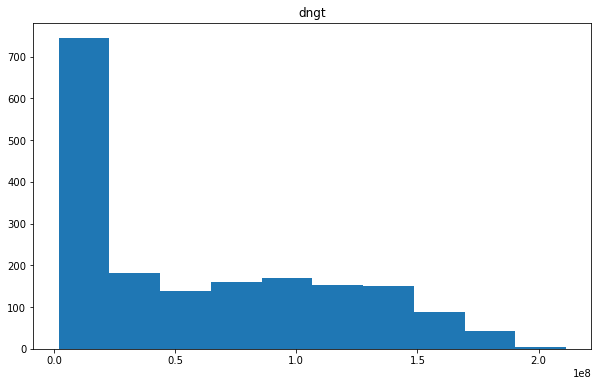

In [24]:
for col in df_FDS.columns:
    plt.figure(figsize=(10,6))
    plt.hist(df_FDS[col])
    plt.title(col)
    # Save an image of the chart and print it to the screen
    plt.savefig("Natural Gas FDS Cumulative Histogram Plots.png")
    plt.show()
    print()

# Line Plots

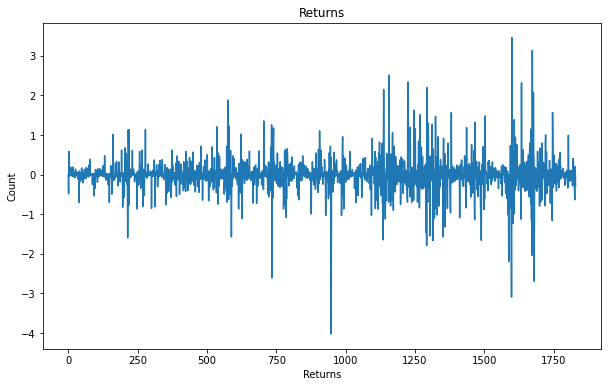

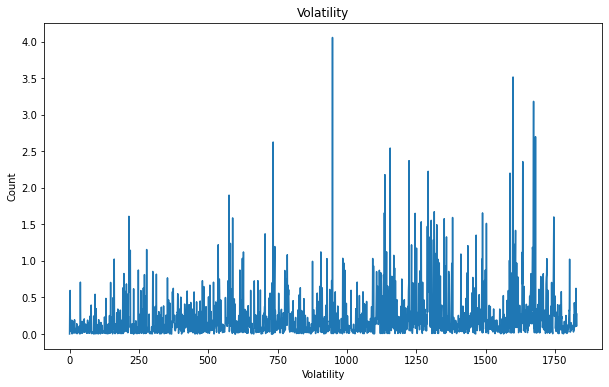

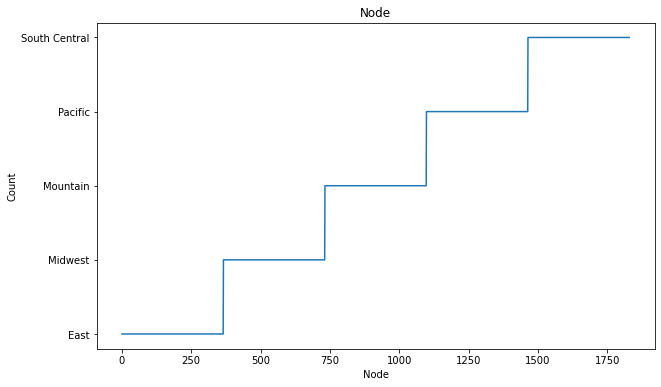

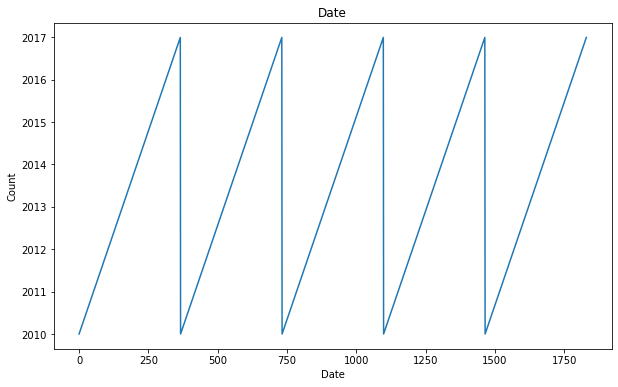

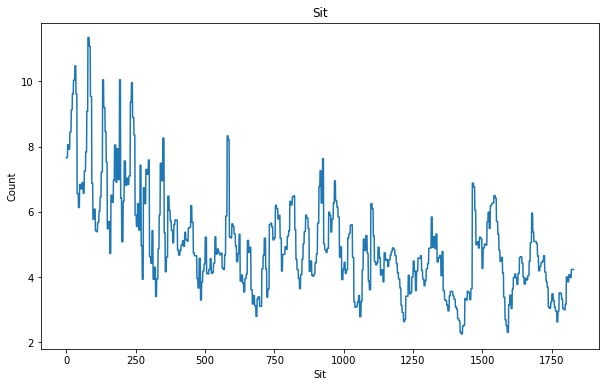

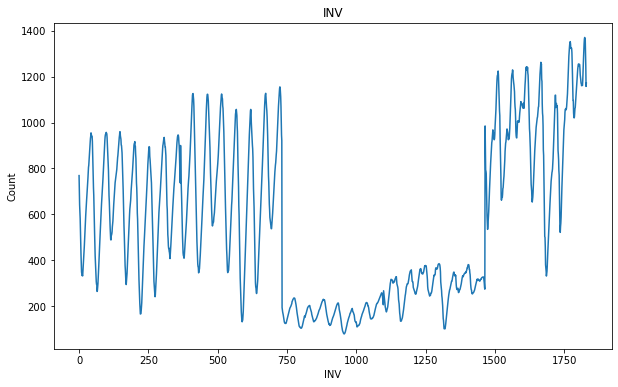

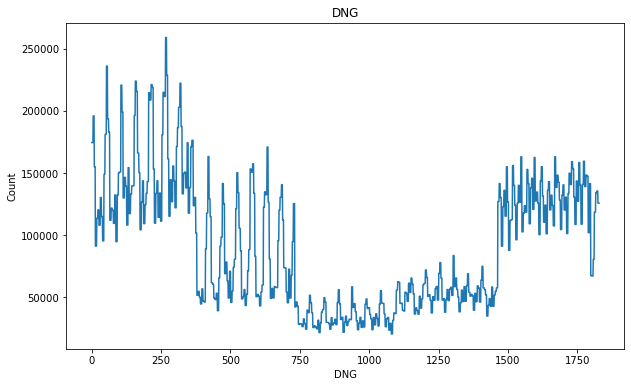

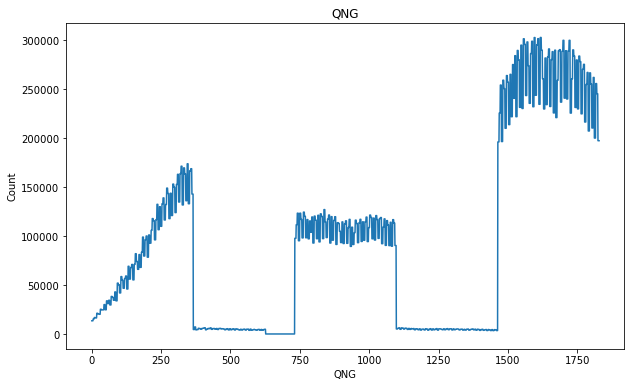

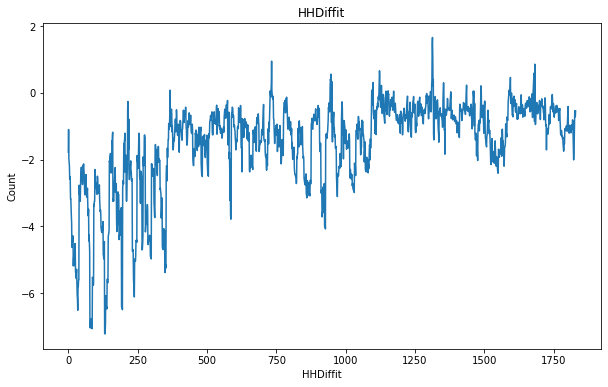

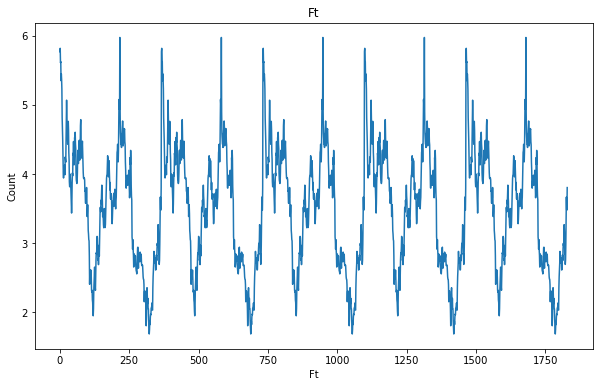

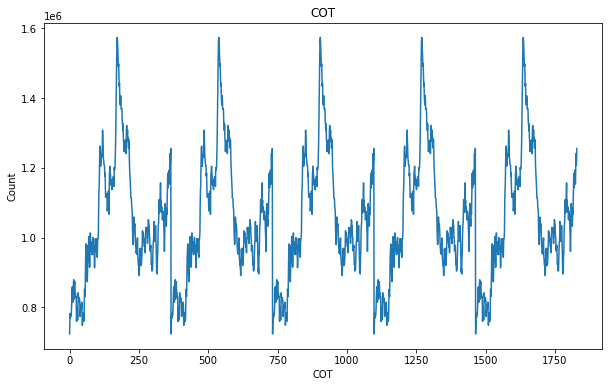

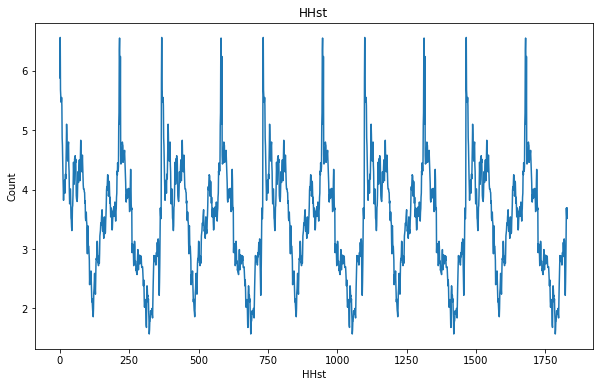

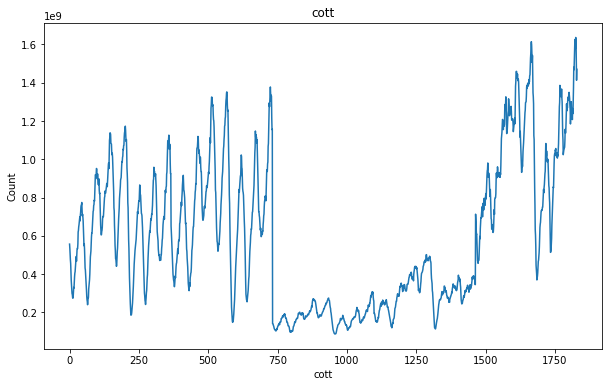

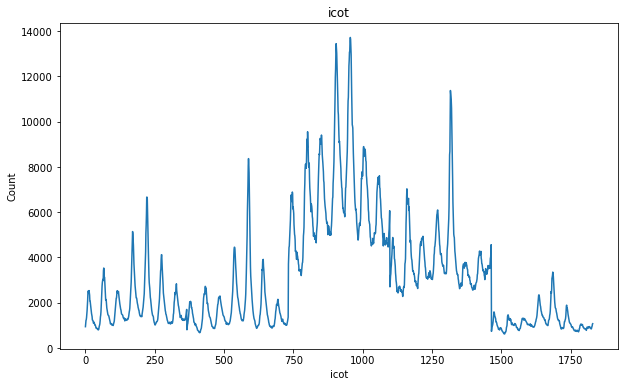

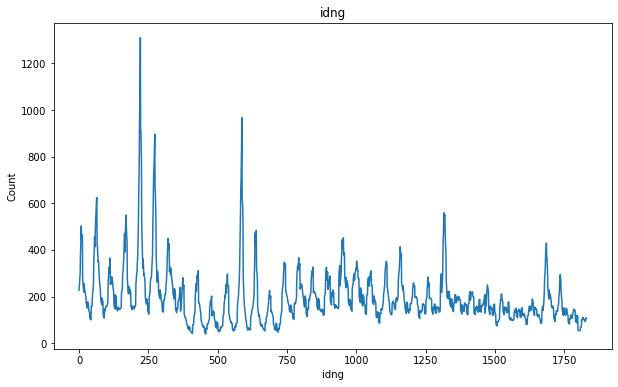

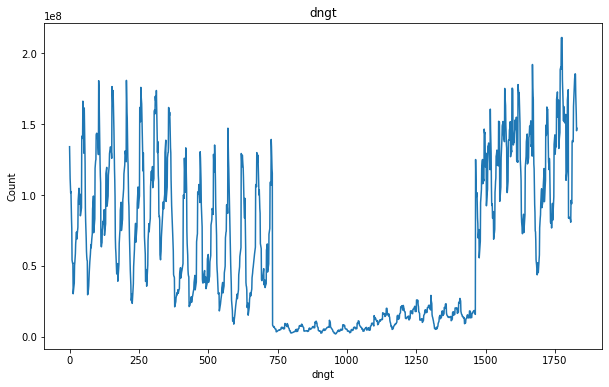

In [25]:
for col in df_FDS.columns: 
    plt.figure(figsize=(10,6))
    plt.plot(df_FDS[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    print()

# Boxplots

In [26]:
df_FDS.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst', 'cott', 'icot', 'idng', 'dngt'],
      dtype='object')

In [27]:
cols_date = ['Returns', 'Volatility', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst', 'cott', 'icot', 'idng', 'dngt']

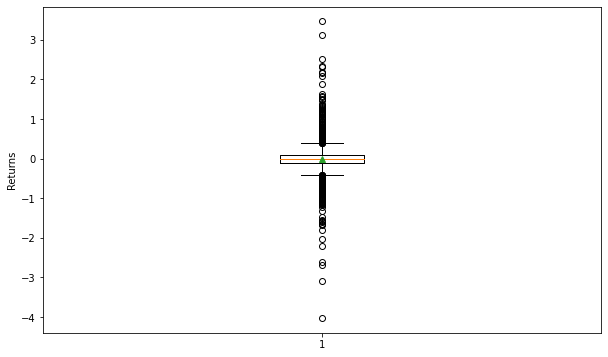

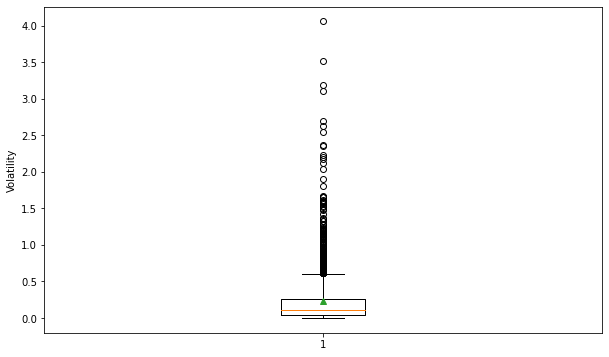

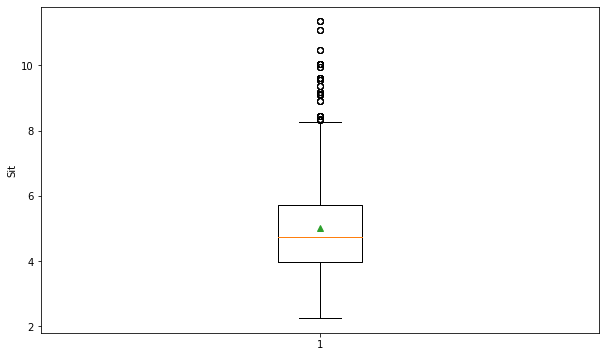

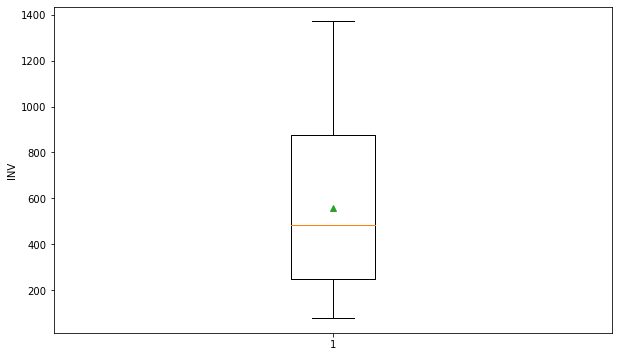

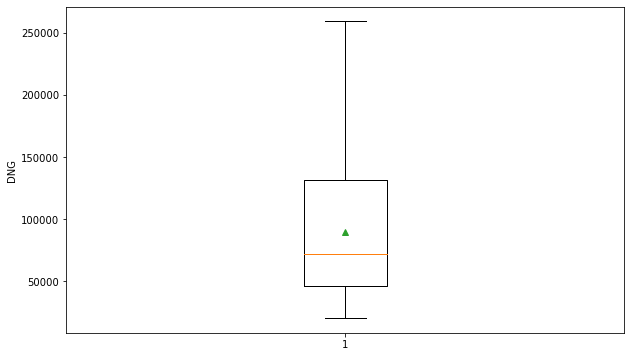

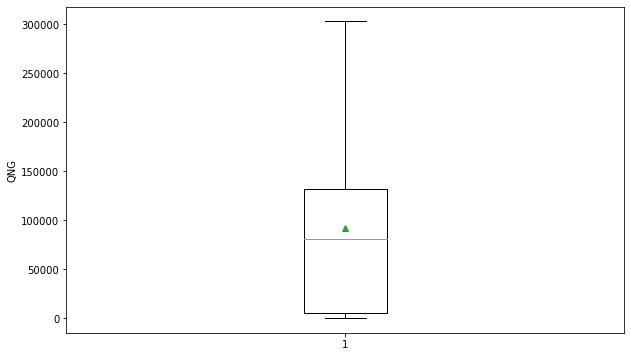

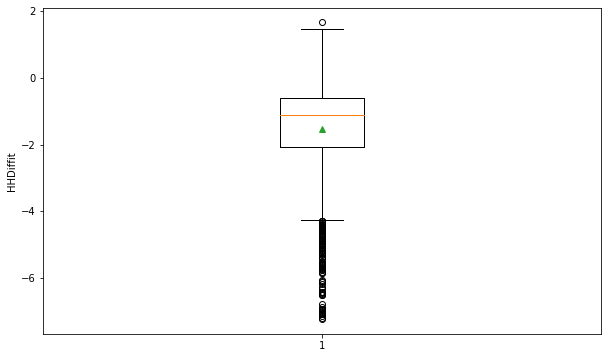

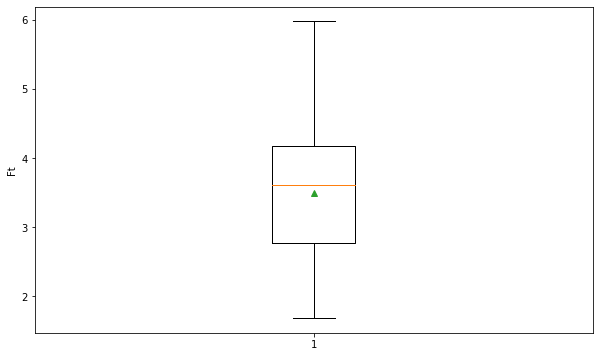

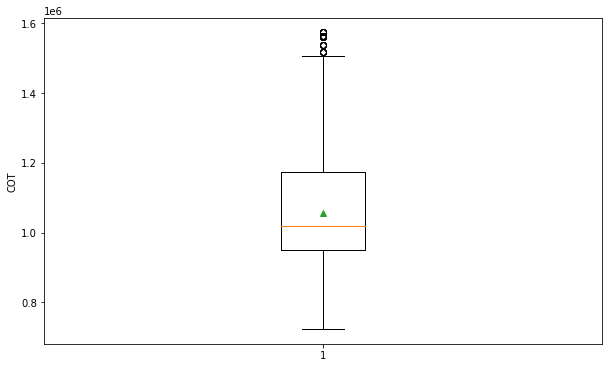

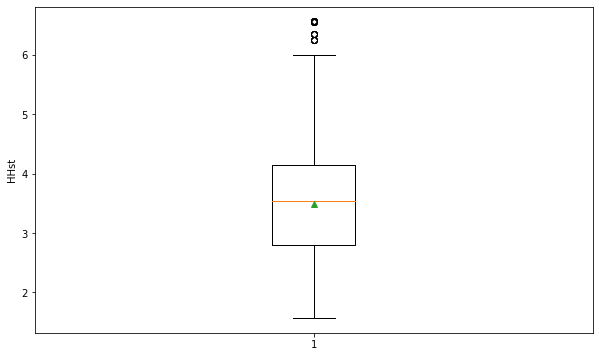

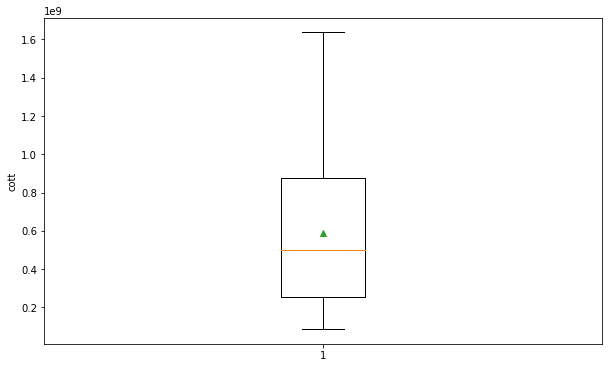

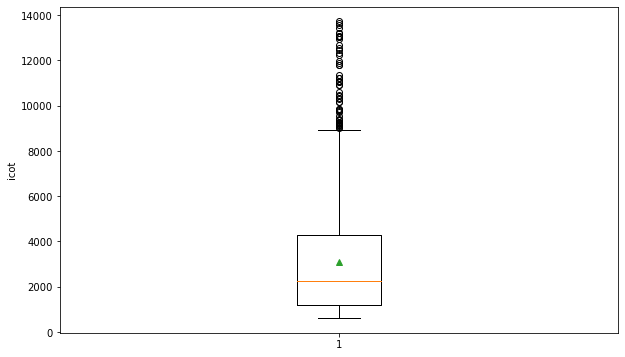

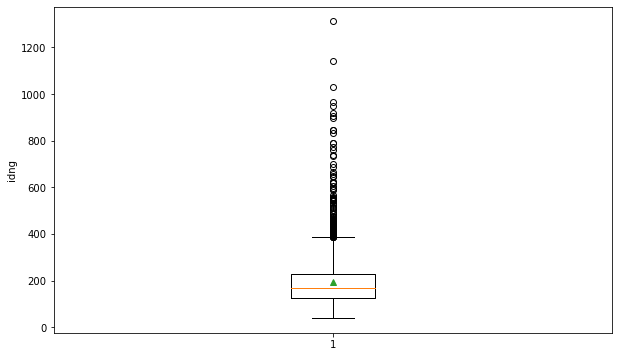

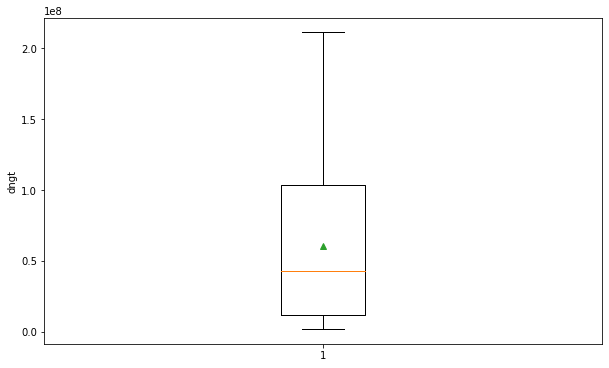

In [28]:
# to create a boxplot of all the columns in the dataset
for col in cols_date: 
    plt.figure(figsize=(10,6))
    plt.boxplot(df_FDS[col], showmeans=True)
    plt.ylabel(col)
    plt.show()

# End Cumulative Plots

# Begin: Break the "df_FDS" into columns

In [29]:
df_FDS.Node.value_counts()

Mountain         366
Pacific          366
East             366
Midwest          366
South Central    366
Name: Node, dtype: int64

In [30]:
fds_East = df_FDS.loc[df_FDS.Node=="East"]
fds_East.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Returns     366 non-null    float64       
 1   Volatility  366 non-null    float64       
 2   Node        366 non-null    object        
 3   Date        366 non-null    datetime64[ns]
 4   Sit         366 non-null    float64       
 5   INV         366 non-null    int64         
 6   DNG         366 non-null    float64       
 7   QNG         366 non-null    float64       
 8   HHDiffit    366 non-null    float64       
 9   Ft          366 non-null    float64       
 10  COT         366 non-null    int64         
 11  HHst        366 non-null    float64       
 12  cott        366 non-null    int64         
 13  icot        366 non-null    float64       
 14  idng        366 non-null    float64       
 15  dngt        366 non-null    float64       
dtypes: datetime64[ns](1), floa

In [31]:
fds_East.describe()

,Returns,Volatility,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,cott,icot,idng,dngt
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02,366.000000,3.660000e+02,366.000000,366.000000,3.660000e+02
mean,-0.001803,0.124430,6.959399,643.286885,152808.677596,86671.005464,-3.471421,3.493694,1.055391e+06,3.487978,6.755678e+08,1934.384238,282.401225,9.731731e+07
std,0.246127,0.215037,1.775059,215.518749,39200.012165,48377.842786,1.503977,0.873156,1.751522e+05,0.937066,2.449250e+08,1038.406048,173.915042,3.872576e+07
min,-1.596309,0.000000,3.400000,167.000000,91133.000000,13475.000000,-7.230000,1.687000,7.240870e+05,1.570000,1.859091e+08,796.924468,99.804188,2.354869e+07
25%,-0.039512,0.017746,5.677500,468.500000,121722.500000,41924.200000,-4.475000,2.773000,9.493555e+05,2.790000,4.902404e+08,1235.966349,163.948192,6.898085e+07
50%,0.000000,0.042248,6.870000,662.000000,143668.000000,81122.500000,-3.180000,3.611500,1.019501e+06,3.540000,6.865678e+08,1578.007302,227.676694,9.388335e+07
75%,0.046308,0.119048,8.022500,836.750000,181102.025000,132187.387500,-2.342500,4.167250,1.174931e+06,4.150000,8.640297e+08,2318.361975,323.581444,1.287942e+08
max,1.142737,1.610057,11.350000,960.000000,259140.250000,173862.750000,-0.260000,5.975000,1.573733e+06,6.560000,1.173169e+09,6667.293413,1310.914671,1.809858e+08


In [32]:
fds_East.head()

,Returns,Volatility,Node,Date,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,cott,icot,idng,dngt
0,0.000000,0.000000,East,2010-01-01,7.66,769,174475.2,13475.0,-1.78,5.770,724087,5.88,556822903,941.595579,226.885826,134171428.8
1,-0.481303,0.484173,East,2010-01-08,7.66,703,174475.2,13475.0,-1.10,5.818,760159,6.56,534391777,1081.307255,248.186629,122656065.6
2,0.587787,0.595347,East,2010-01-15,7.66,642,174475.2,13475.0,-1.98,5.610,782549,5.68,502396458,1218.923676,271.768224,112013078.4
3,0.058840,0.061240,East,2010-01-22,7.66,616,174475.2,13475.0,-2.10,5.625,769887,5.56,474250392,1249.816558,283.238961,107476723.2
4,0.041964,0.044199,East,2010-01-29,7.66,582,174475.2,13475.0,-2.19,5.350,782673,5.47,455515686,1344.798969,299.785567,101544566.4


# Begin: Subplots

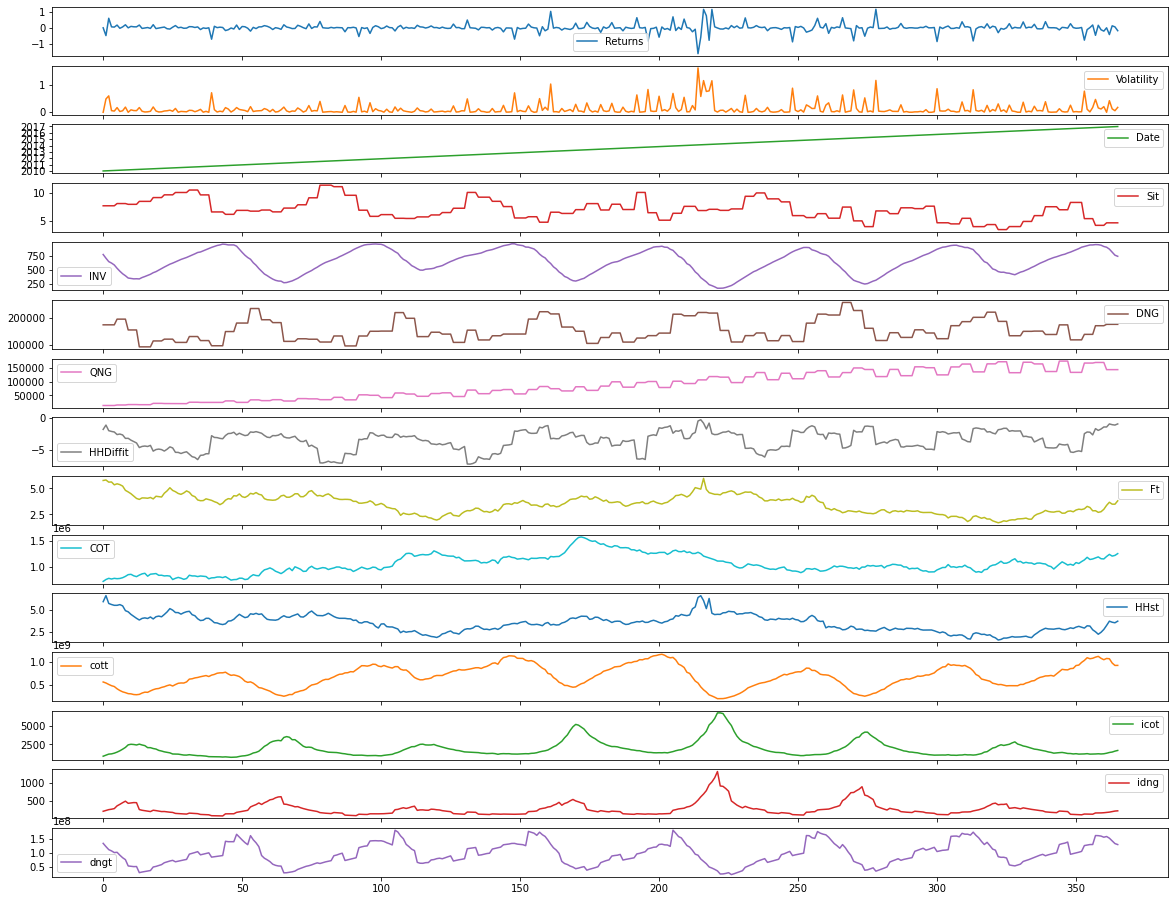

In [33]:
fds_East.plot(figsize=(20, 16), subplots=True)
plt.show()

In [34]:
fds_Midwest.plot(figsize=(20, 16), subplots=True)
plt.show()

NameError: name 'fds_Midwest' is not defined

In [ ]:
fds_Mountain.plot(figsize=(20, 16), subplots=True)
plt.show()

In [ ]:
fds_Pacific.plot(figsize=(20, 16), subplots=True)
plt.show()

In [ ]:
fds_SC.plot(figsize=(20, 16), subplots=True)
plt.show()

# End: Subplots

In [ ]:
fds_Midwest = df_FDS.loc[df_FDS.Node=="Midwest"]
fds_Midwest.info()          

In [ ]:
fds_Midwest.describe()

In [ ]:
fds_Midwest.head()

In [ ]:
df_FDS.Node.value_counts()

In [ ]:
fds_Mountain = df_FDS.loc[df_FDS.Node=="Mountain"]
fds_Mountain.info()    

In [ ]:
fds_Mountain.describe()

In [ ]:
fds_Mountain.head()

In [35]:
fds_Pacific = df_FDS.loc[df_FDS.Node=="Pacific"]
fds_Pacific.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 1098 to 1463
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Returns     366 non-null    float64       
 1   Volatility  366 non-null    float64       
 2   Node        366 non-null    object        
 3   Date        366 non-null    datetime64[ns]
 4   Sit         366 non-null    float64       
 5   INV         366 non-null    int64         
 6   DNG         366 non-null    float64       
 7   QNG         366 non-null    float64       
 8   HHDiffit    366 non-null    float64       
 9   Ft          366 non-null    float64       
 10  COT         366 non-null    int64         
 11  HHst        366 non-null    float64       
 12  cott        366 non-null    int64         
 13  icot        366 non-null    float64       
 14  idng        366 non-null    float64       
 15  dngt        366 non-null    float64       
dtypes: datetime64[ns](1), 

In [36]:
fds_Pacific.describe()

,Returns,Volatility,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,cott,icot,idng,dngt
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02,366.000000,3.660000e+02,366.000000,366.000000,3.660000e+02
mean,-0.007465,0.328783,4.012678,288.439891,52319.617486,4707.874317,-0.524699,3.493694,1.055391e+06,3.487978,3.060160e+08,3918.199129,194.455529,1.515887e+07
std,0.524034,0.414249,0.844165,64.135904,9742.728185,658.629558,0.395225,0.873156,1.751522e+05,0.937066,9.044534e+07,1463.076858,75.569919,4.648038e+06
min,-1.791759,0.000000,2.250000,102.000000,34743.800000,3434.800000,-1.840000,1.687000,7.240870e+05,1.570000,1.135707e+08,2276.927052,105.593201,5.163177e+06
25%,-0.200671,0.068052,3.410000,258.000000,46315.600000,4241.500000,-0.730000,2.773000,9.493555e+05,2.790000,2.508678e+08,3067.798997,144.643799,1.226550e+07
50%,0.000000,0.184615,4.055000,301.500000,51656.625000,4779.250000,-0.540000,3.611500,1.019501e+06,3.540000,3.136699e+08,3515.540507,175.138024,1.497780e+07
75%,0.157262,0.458346,4.587500,335.000000,58142.500000,5210.687500,-0.320000,4.167250,1.174931e+06,4.150000,3.630351e+08,4299.103568,208.410325,1.801151e+07
max,2.512306,2.544375,6.250000,386.000000,83463.750000,6291.500000,1.660000,5.975000,1.573733e+06,6.560000,5.016705e+08,11378.708738,559.014957,2.921231e+07


In [37]:
fds_Pacific.head()

,Returns,Volatility,Node,Date,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,cott,icot,idng,dngt
1098,0.000000,0.000000,Pacific,2010-01-01,6.25,268,55720.8,5109.2,-0.37,5.770,724087,5.88,194055316,2701.817164,207.913433,14933174.4
1099,0.000000,0.007558,Pacific,2010-01-08,6.25,257,55720.8,5109.2,0.31,5.818,760159,6.56,195360863,2957.817121,216.812451,14320245.6
1100,0.000000,0.007558,Pacific,2010-01-15,6.25,246,55720.8,5109.2,-0.57,5.610,782549,5.68,192507054,3181.093496,226.507317,13707316.8
1101,0.191055,0.200477,Pacific,2010-01-22,6.25,235,55720.8,5109.2,-0.69,5.625,769887,5.56,180923445,3276.114894,237.109787,13094388.0
1102,0.122602,0.131356,Pacific,2010-01-29,6.25,221,55720.8,5109.2,-0.78,5.350,782673,5.47,172970733,3541.506787,252.130317,12314296.8


In [38]:
fds_SC = df_FDS.loc[df_FDS.Node=="South Central"]
fds_SC.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 1464 to 1829
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Returns     366 non-null    float64       
 1   Volatility  366 non-null    float64       
 2   Node        366 non-null    object        
 3   Date        366 non-null    datetime64[ns]
 4   Sit         366 non-null    float64       
 5   INV         366 non-null    int64         
 6   DNG         366 non-null    float64       
 7   QNG         366 non-null    float64       
 8   HHDiffit    366 non-null    float64       
 9   Ft          366 non-null    float64       
 10  COT         366 non-null    int64         
 11  HHst        366 non-null    float64       
 12  cott        366 non-null    int64         
 13  icot        366 non-null    float64       
 14  idng        366 non-null    float64       
 15  dngt        366 non-null    float64       
dtypes: datetime64[ns](1), 

In [39]:
fds_SC.describe()

,Returns,Volatility,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,cott,icot,idng,dngt
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02,366.000000,3.660000e+02,366.000000,366.000000,3.660000e+02
mean,-0.017440,0.301899,4.351011,973.601093,127110.202186,255757.857923,-0.863033,3.493694,1.055391e+06,3.487978,1.029097e+09,1171.112203,141.829444,1.232218e+08
std,0.547718,0.463124,1.062798,230.356910,20830.778526,31247.099279,0.594338,0.873156,1.751522e+05,0.937066,3.005068e+08,457.838644,56.212055,3.469738e+07
min,-3.091042,0.000000,2.300000,332.000000,66996.400000,196213.800000,-2.410000,1.687000,7.240870e+05,1.570000,3.696614e+08,619.098347,53.468795,4.371577e+07
25%,-0.167054,0.062584,3.510000,818.750000,113066.850000,230394.400000,-1.237500,2.773000,9.493555e+05,2.790000,7.919491e+08,888.078721,107.219982,9.539956e+07
50%,0.000000,0.147288,4.190000,1014.500000,127791.475000,257196.750000,-0.735000,3.611500,1.019501e+06,3.540000,1.042725e+09,1033.714091,132.299436,1.256230e+08
75%,0.116155,0.340178,5.030000,1160.750000,141253.875000,285957.500000,-0.420000,4.167250,1.174931e+06,4.150000,1.264764e+09,1288.836473,154.770435,1.468193e+08
max,3.465736,3.517207,6.880000,1370.000000,163019.500000,302955.500000,0.860000,5.975000,1.573733e+06,6.560000,1.636590e+09,3353.728916,429.284639,2.112762e+08


In [40]:
fds_SC.head()

,Returns,Volatility,Node,Date,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,cott,icot,idng,dngt
1464,0.000000,0.000000,South Central,2010-01-01,6.88,985,127012.0,196213.8,-1.00,5.770,724087,5.88,713225695,735.113706,128.946193,125106820.0
1465,-1.139434,1.132892,South Central,2010-01-08,6.88,886,127012.0,196213.8,-0.32,5.818,760159,6.56,673500874,857.967269,143.354402,112532632.0
1466,1.321756,1.352310,South Central,2010-01-15,6.88,793,127012.0,196213.8,-1.20,5.610,782549,5.68,620561357,986.820933,160.166456,100720516.0
1467,0.095310,0.113899,South Central,2010-01-22,6.88,789,127012.0,196213.8,-1.32,5.625,769887,5.56,607440843,975.775665,160.978454,100212468.0
1468,0.065958,0.084260,South Central,2010-01-29,6.88,779,127012.0,196213.8,-1.41,5.350,782673,5.47,609702267,1004.715019,163.044929,98942348.0


# End: Break the "df_FDS" into columns 

# Begin: Histogram of Nodes

In [41]:
node = df_FDS.Node.value_counts()
node

Mountain         366
Pacific          366
East             366
Midwest          366
South Central    366
Name: Node, dtype: int64

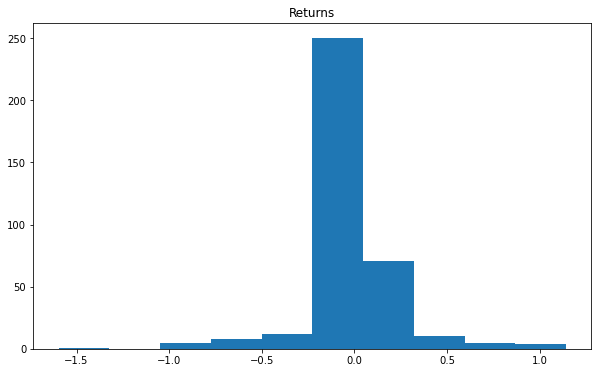

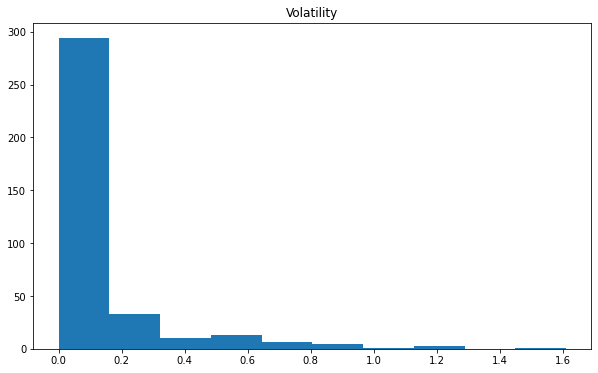

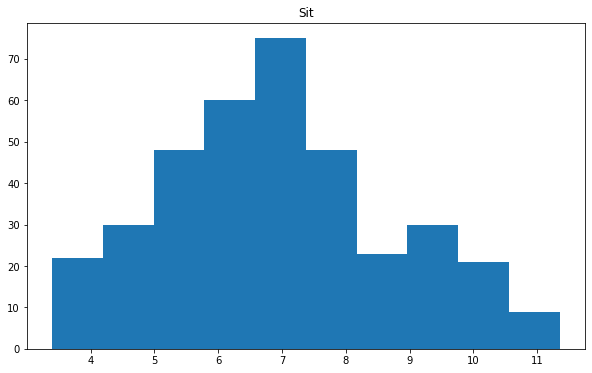

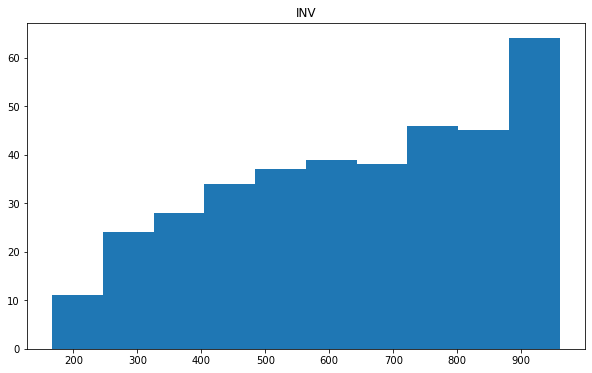

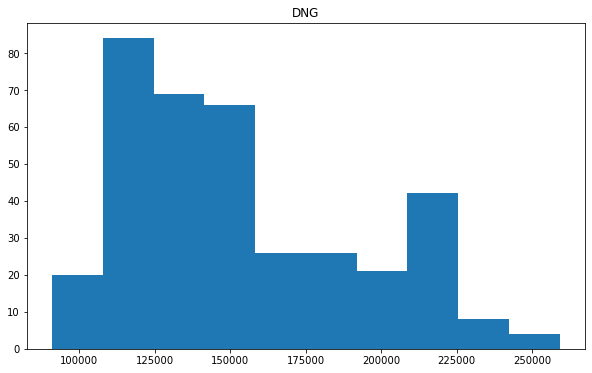

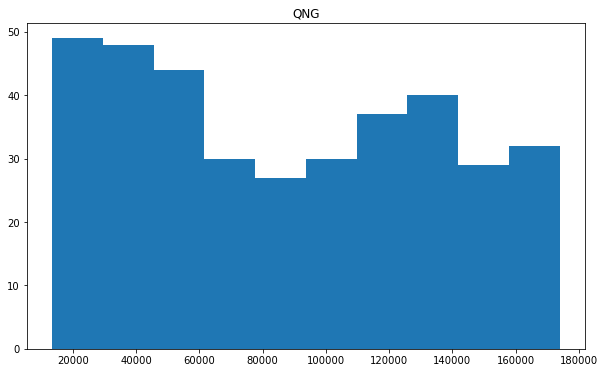

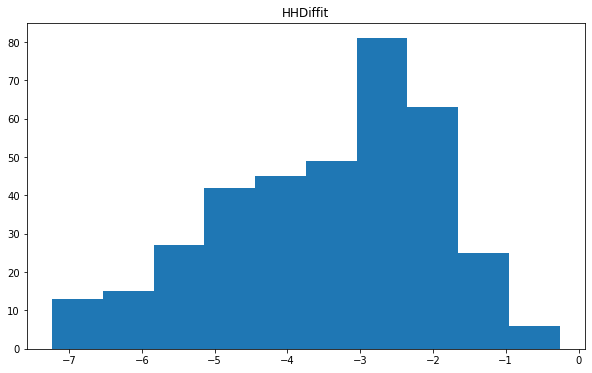

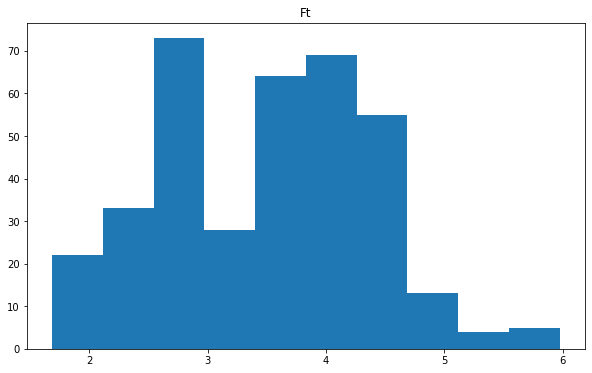

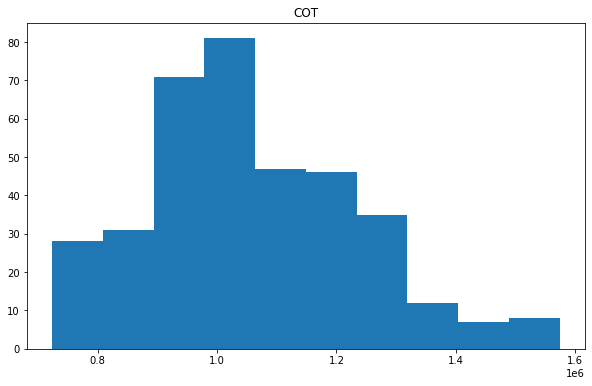

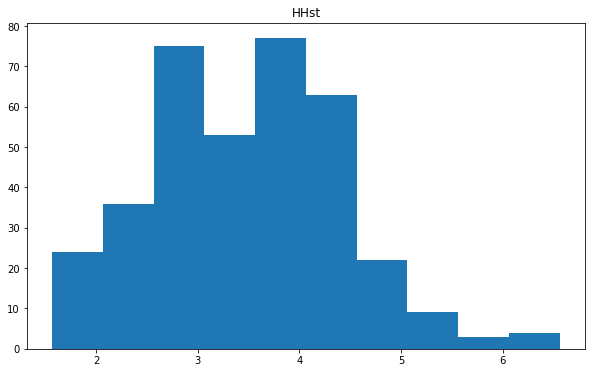

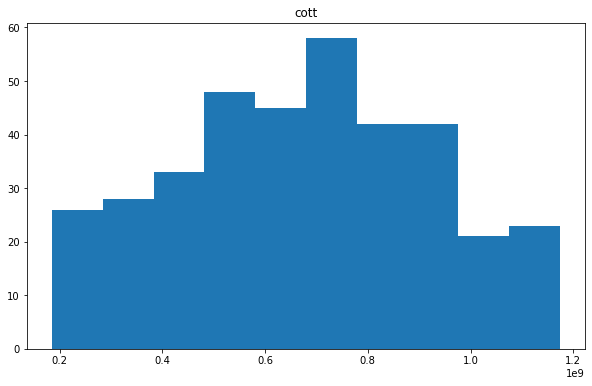

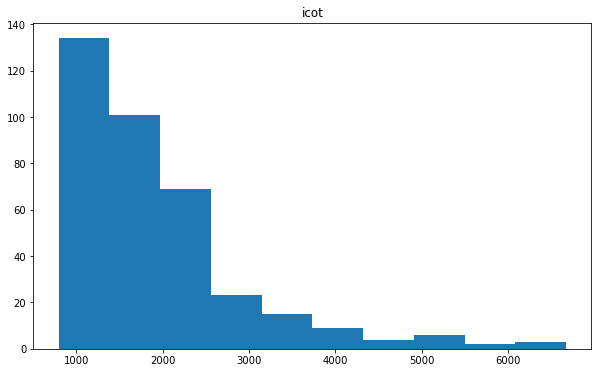

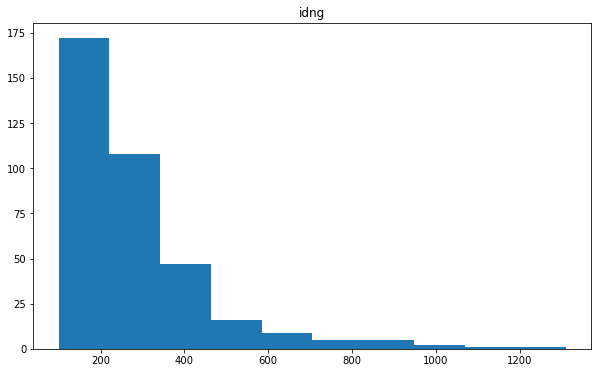

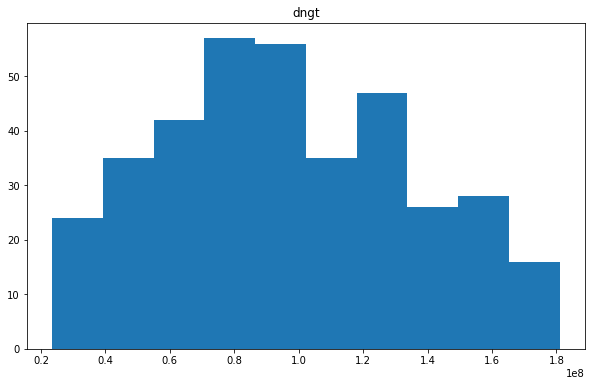

In [42]:
for col in cols_date:
    plt.figure(figsize=(10,6))
    plt.hist(fds_East[col])
    plt.title(col)
    plt.show()
    print()

In [43]:
for col in cols_date:
    plt.figure(figsize=(10,6))
    plt.hist(fds_Midwest[col])
    plt.title(col)
    plt.show()
    print()

NameError: name 'fds_Midwest' is not defined

<Figure size 720x432 with 0 Axes>

In [ ]:
for col in cols_date:
    plt.figure(figsize=(10,6))
    plt.hist(fds_Mountain[col])
    plt.title(col)
    plt.show()
    print()

In [ ]:
for col in cols_date:
    plt.figure(figsize=(10,6))
    plt.hist(fds_Pacific[col])
    plt.title(col)
    plt.show()
    print()

In [ ]:
for col in cols_date:
    plt.figure(figsize=(10,6))
    plt.hist(fds_SC[col])
    plt.title(col)
    plt.show()
    print()

# End: Histogram of Nodes

# Begin: Line plots of Nodes

In [44]:
node

Mountain         366
Pacific          366
East             366
Midwest          366
South Central    366
Name: Node, dtype: int64

In [55]:
fds_East.describe()

,Returns,Volatility,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,cott,icot,idng,dngt
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02,366.000000,3.660000e+02,366.000000,366.000000,3.660000e+02
mean,-0.001803,0.124430,6.959399,643.286885,152808.677596,86671.005464,-3.471421,3.493694,1.055391e+06,3.487978,6.755678e+08,1934.384238,282.401225,9.731731e+07
std,0.246127,0.215037,1.775059,215.518749,39200.012165,48377.842786,1.503977,0.873156,1.751522e+05,0.937066,2.449250e+08,1038.406048,173.915042,3.872576e+07
min,-1.596309,0.000000,3.400000,167.000000,91133.000000,13475.000000,-7.230000,1.687000,7.240870e+05,1.570000,1.859091e+08,796.924468,99.804188,2.354869e+07
25%,-0.039512,0.017746,5.677500,468.500000,121722.500000,41924.200000,-4.475000,2.773000,9.493555e+05,2.790000,4.902404e+08,1235.966349,163.948192,6.898085e+07
50%,0.000000,0.042248,6.870000,662.000000,143668.000000,81122.500000,-3.180000,3.611500,1.019501e+06,3.540000,6.865678e+08,1578.007302,227.676694,9.388335e+07
75%,0.046308,0.119048,8.022500,836.750000,181102.025000,132187.387500,-2.342500,4.167250,1.174931e+06,4.150000,8.640297e+08,2318.361975,323.581444,1.287942e+08
max,1.142737,1.610057,11.350000,960.000000,259140.250000,173862.750000,-0.260000,5.975000,1.573733e+06,6.560000,1.173169e+09,6667.293413,1310.914671,1.809858e+08


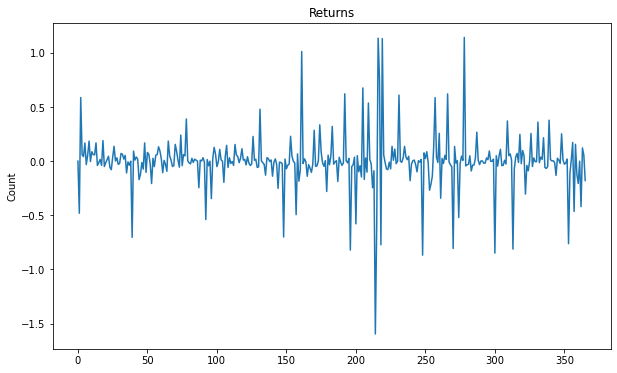

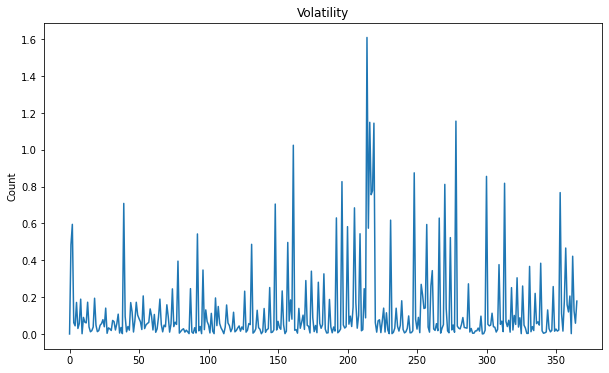

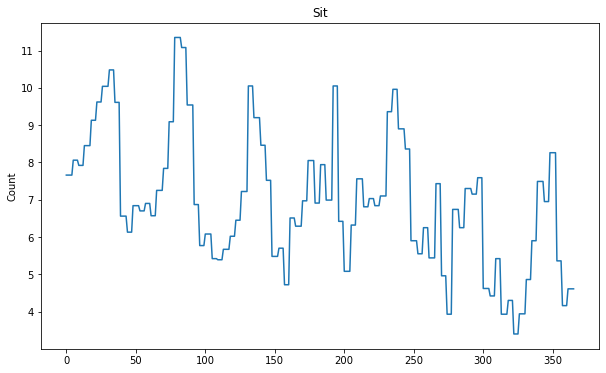

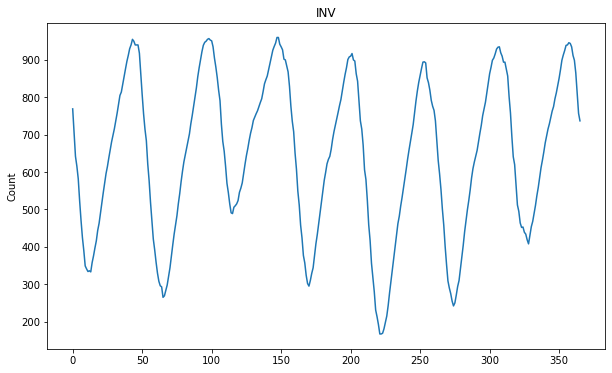

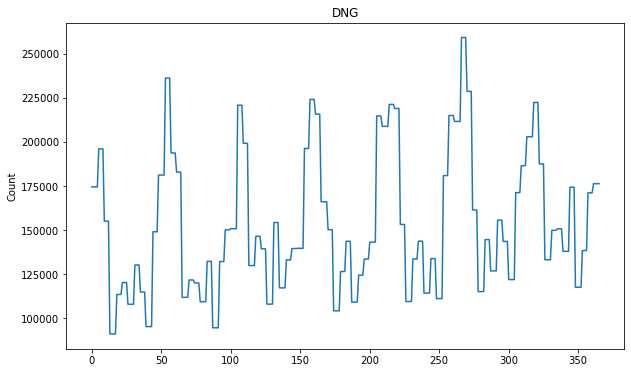

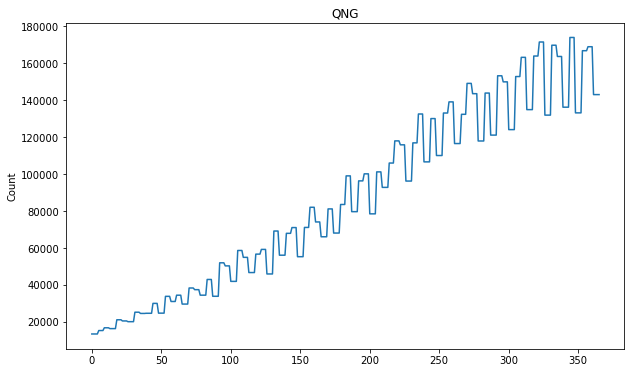

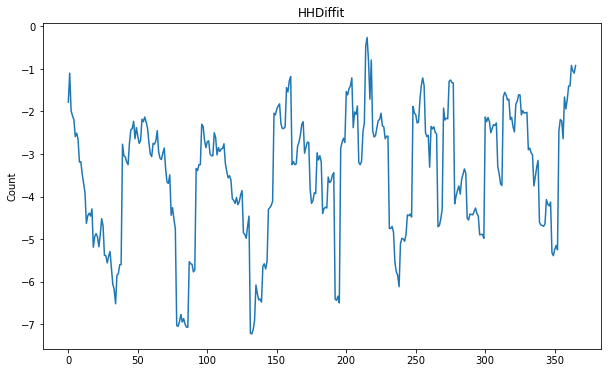

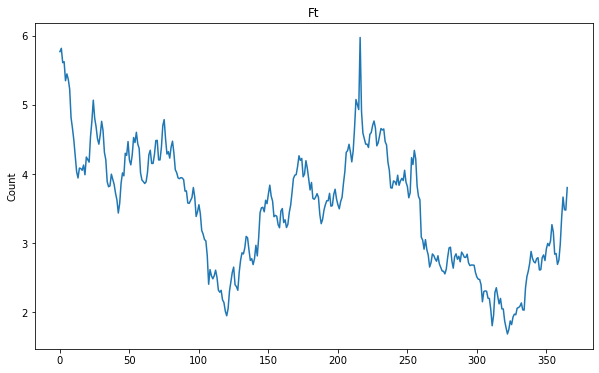

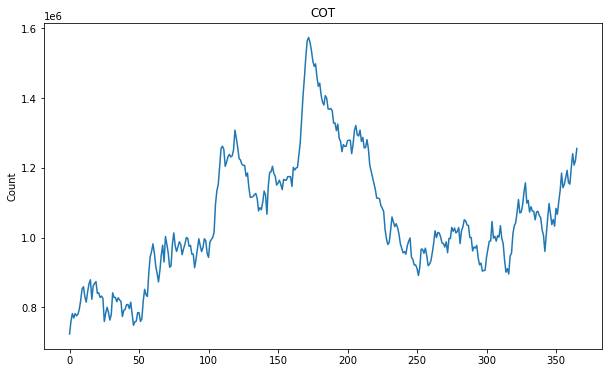

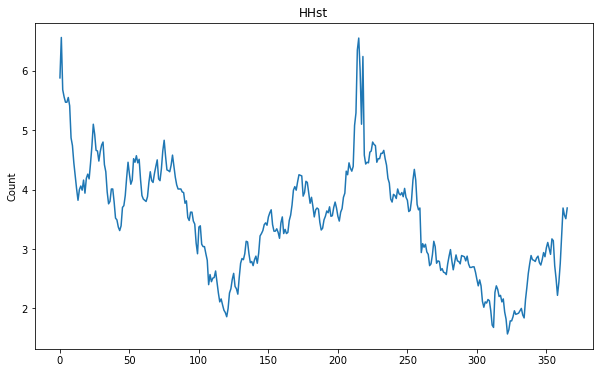

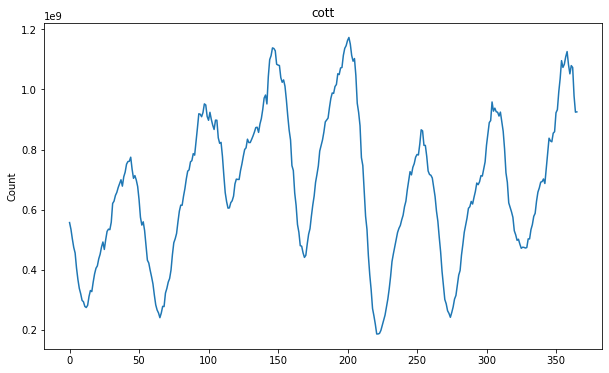

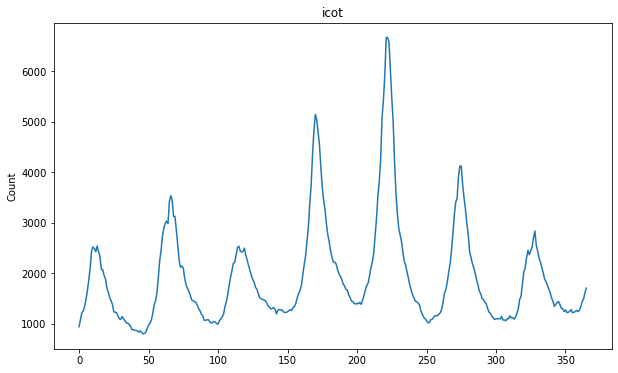

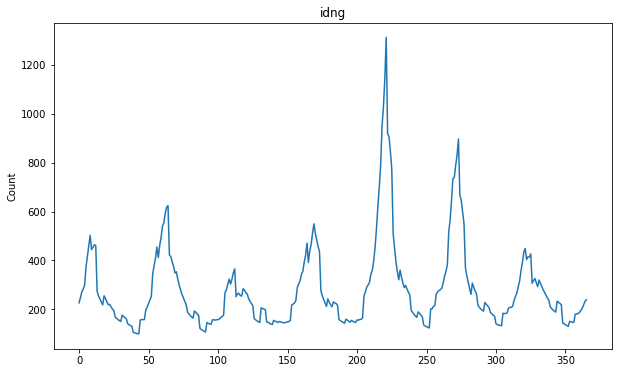

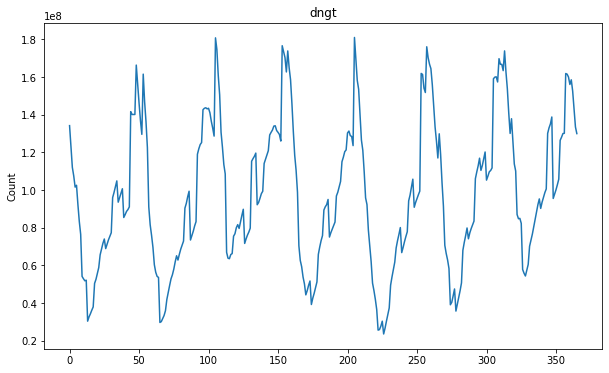

In [46]:
for col in cols_date: 
    plt.figure(figsize=(10,6))
    plt.plot(fds_East[col])
    plt.title(col)
    plt.ylabel("Count")
    plt.show()
    print()

In [47]:
for col in cols_date: 
    plt.figure(figsize=(10,6))
    plt.plot(fds_Midwest[col])
    plt.title(col)
    plt.ylabel("Count")
    plt.show()
    print()

NameError: name 'fds_Midwest' is not defined

<Figure size 720x432 with 0 Axes>

In [ ]:
for col in cols_date: 
    plt.figure(figsize=(10,6))
    plt.plot(fds_Mountain[col])
    plt.title(col)
    plt.ylabel("Count")
    plt.show()
    print()

In [ ]:
for col in cols_date: 
    plt.figure(figsize=(10,6))
    plt.plot(fds_Pacific[col])
    plt.title(col)
    plt.ylabel("Count")
    plt.show()
    print()

In [ ]:
for col in cols_date: 
    plt.figure(figsize=(10,6))
    plt.plot(fds_SC[col])
    plt.title(col)
    plt.ylabel("Count")
    plt.show()
    print()

# End: Line plots of Nodes

# Begin: Machine Learning

In [48]:
df_FDS.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst', 'cott', 'icot', 'idng', 'dngt'],
      dtype='object')

In [49]:
df_FDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Returns     1830 non-null   float64       
 1   Volatility  1830 non-null   float64       
 2   Node        1830 non-null   object        
 3   Date        1830 non-null   datetime64[ns]
 4   Sit         1830 non-null   float64       
 5   INV         1830 non-null   int64         
 6   DNG         1830 non-null   float64       
 7   QNG         1830 non-null   float64       
 8   HHDiffit    1830 non-null   float64       
 9   Ft          1830 non-null   float64       
 10  COT         1830 non-null   int64         
 11  HHst        1830 non-null   float64       
 12  cott        1830 non-null   int64         
 13  icot        1830 non-null   float64       
 14  idng        1830 non-null   float64       
 15  dngt        1830 non-null   float64       
dtypes: datetime64[ns](1), fl

In [50]:
# There was no need to perform this.

str_cols = []

for col in df_FDS.columns:
    if (df_FDS[col].dtype == object):
        print(col)
        df_FDS.append(col)
        
df_str = df_FDS.loc[:, str_cols]
df_str.head()

Node


TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

In [51]:
num_cols = []

for col in df_FDS.columns:
    if (df_FDS[col].dtype != object):
        print(col)
        num_cols.append(col)
        
df_num = df_FDS.loc[:, num_cols]
df_num.head()

Returns
Volatility
Date
Sit
INV
DNG
QNG
HHDiffit
Ft
COT
HHst
cott
icot
idng
dngt


,Returns,Volatility,Date,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,cott,icot,idng,dngt
0,0.000000,0.000000,2010-01-01,7.66,769,174475.2,13475.0,-1.78,5.770,724087,5.88,556822903,941.595579,226.885826,134171428.8
1,-0.481303,0.484173,2010-01-08,7.66,703,174475.2,13475.0,-1.10,5.818,760159,6.56,534391777,1081.307255,248.186629,122656065.6
2,0.587787,0.595347,2010-01-15,7.66,642,174475.2,13475.0,-1.98,5.610,782549,5.68,502396458,1218.923676,271.768224,112013078.4
3,0.058840,0.061240,2010-01-22,7.66,616,174475.2,13475.0,-2.10,5.625,769887,5.56,474250392,1249.816558,283.238961,107476723.2
4,0.041964,0.044199,2010-01-29,7.66,582,174475.2,13475.0,-2.19,5.350,782673,5.47,455515686,1344.798969,299.785567,101544566.4


In [52]:
df_FDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Returns     1830 non-null   float64       
 1   Volatility  1830 non-null   float64       
 2   Node        1830 non-null   object        
 3   Date        1830 non-null   datetime64[ns]
 4   Sit         1830 non-null   float64       
 5   INV         1830 non-null   int64         
 6   DNG         1830 non-null   float64       
 7   QNG         1830 non-null   float64       
 8   HHDiffit    1830 non-null   float64       
 9   Ft          1830 non-null   float64       
 10  COT         1830 non-null   int64         
 11  HHst        1830 non-null   float64       
 12  cott        1830 non-null   int64         
 13  icot        1830 non-null   float64       
 14  idng        1830 non-null   float64       
 15  dngt        1830 non-null   float64       
dtypes: datetime64[ns](1), fl

In [53]:
# linear model, drop_first=True
# One Hot Encode, columns with less than 10 categories.
cols_oh = ["Node"]
df_oh = pd.get_dummies(df_FDS.loc[:, cols_oh], drop_first=True)
df_oh.head()

,Node_Midwest,Node_Mountain,Node_Pacific,Node_South Central
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [54]:
# no scaler
df_no_scale = df_num.copy()
df_no_scale.head()

,Returns,Volatility,Date,Sit,INV,DNG,QNG,HHDiffit,Ft,COT,HHst,cott,icot,idng,dngt
0,0.000000,0.000000,2010-01-01,7.66,769,174475.2,13475.0,-1.78,5.770,724087,5.88,556822903,941.595579,226.885826,134171428.8
1,-0.481303,0.484173,2010-01-08,7.66,703,174475.2,13475.0,-1.10,5.818,760159,6.56,534391777,1081.307255,248.186629,122656065.6
2,0.587787,0.595347,2010-01-15,7.66,642,174475.2,13475.0,-1.98,5.610,782549,5.68,502396458,1218.923676,271.768224,112013078.4
3,0.058840,0.061240,2010-01-22,7.66,616,174475.2,13475.0,-2.10,5.625,769887,5.56,474250392,1249.816558,283.238961,107476723.2
4,0.041964,0.044199,2010-01-29,7.66,582,174475.2,13475.0,-2.19,5.350,782673,5.47,455515686,1344.798969,299.785567,101544566.4


In [ ]:
# no scale "df_FDS" set
df_ns = pd.concat([df_no_scale, df_oh], axis=1)
df_ns.head()

In [ ]:
df_ns.info()

In [ ]:
# scaler
scaler = StandardScaler().fit(df_num)
df_scale_scaler = pd.DataFrame(scaler.transform(df_num), columns=df_num.columns)
df_scale_scaler.head()

In [ ]:
# scaled dataset 
df_scale_nan = pd.concat([df_scale_scaler, df_oh])
df_scale_nan.head()

In [ ]:
df_scale_nan.shape

In [ ]:
df_scale_nan.info()

In [ ]:
# Null analysis
df_scale = df_scale.fillna(value=0)
df_scale.head()

In [ ]:
# Confirm "scaled "

In [ ]:
df_scale.info()

In [ ]:
train_df = dfnew.loc[(dfnew.Date >= datetime.datetime(2010,1,1)) & (dfnew.Date <= datetime.datetime(2015,12,30))]

In [ ]:
test_df = dfnew.loc[(dfnew.Date >= datetime.datetime(2016,1,1)) & (dfnew.Date <= datetime.datetime(2016,12,30))]

In [ ]:
node